In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../dataset/kalimati.csv")


In [4]:
df.head()

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
0,0,Tomato Big(Nepali),6/16/2013,Kg,35,40,37.5
1,1,Tomato Small(Local),6/16/2013,Kg,26,32,29.0
2,2,Potato Red,6/16/2013,Kg,20,21,20.5
3,3,Potato White,6/16/2013,Kg,15,16,15.5
4,4,Onion Dry (Indian),6/16/2013,Kg,28,30,29.0


In [5]:
df.tail()

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
197156,197156,Garlic Dry Nepali,5/13/2021,Kg,100,120,110.0
197157,197157,Fish Fresh(Rahu),5/13/2021,KG,270,280,275.0
197158,197158,Fish Fresh(Bachuwa),5/13/2021,KG,225,235,230.0
197159,197159,Fish Fresh(Chhadi),5/13/2021,KG,220,230,225.0
197160,197160,Fish Fresh(Mungari),5/13/2021,KG,240,250,245.0


In [6]:
## Remove unnecessary columns
columns_to_drop = ["SN", "Unit"]


In [7]:
df = df.drop(columns=columns_to_drop)

In [8]:
df.head()

,Commodity,Date,Minimum,Maximum,Average
0,Tomato Big(Nepali),6/16/2013,35,40,37.5
1,Tomato Small(Local),6/16/2013,26,32,29.0
2,Potato Red,6/16/2013,20,21,20.5
3,Potato White,6/16/2013,15,16,15.5
4,Onion Dry (Indian),6/16/2013,28,30,29.0


In [9]:
# Convert date into Datetime
df["Date"] = pd.to_datetime(df["Date"])

In [10]:
df.head()

,Commodity,Date,Minimum,Maximum,Average
0,Tomato Big(Nepali),2013-06-16,35,40,37.5
1,Tomato Small(Local),2013-06-16,26,32,29.0
2,Potato Red,2013-06-16,20,21,20.5
3,Potato White,2013-06-16,15,16,15.5
4,Onion Dry (Indian),2013-06-16,28,30,29.0


In [11]:
print(df.columns)

Index(['Commodity', 'Date', 'Minimum', 'Maximum', 'Average'], dtype='object')


In [12]:
df["Date"].min()

Timestamp('2013-06-16 00:00:00')

In [13]:
df["Date"].max()

Timestamp('2021-05-13 00:00:00')

In [14]:
print(df.shape)

(197161, 5)


In [15]:
df.isnull().sum()

Commodity    0
Date         0
Minimum      0
Maximum      0
Average      0
dtype: int64

In [16]:
df.describe()


,Date,Minimum,Maximum,Average
count,197161,197161.000000,197161.000000,197161.000000
mean,2017-08-09 09:02:22.695563520,85.423938,94.161284,89.792611
min,2013-06-16 00:00:00,1.000000,6.000000,5.000000
25%,2015-08-24 00:00:00,40.000000,45.000000,42.500000
50%,2017-08-03 00:00:00,60.000000,70.000000,65.000000
75%,2019-08-27 00:00:00,100.000000,110.000000,105.000000
max,2021-05-13 00:00:00,1800.000000,2000.000000,1900.000000
std,NaN,77.058896,82.375858,79.619003


In [17]:
df_non_indexed = df.copy()

In [18]:
df_non_indexed

,Commodity,Date,Minimum,Maximum,Average
0,Tomato Big(Nepali),2013-06-16,35,40,37.5
1,Tomato Small(Local),2013-06-16,26,32,29.0
2,Potato Red,2013-06-16,20,21,20.5
3,Potato White,2013-06-16,15,16,15.5
4,Onion Dry (Indian),2013-06-16,28,30,29.0
...,...,...,...,...,...
197156,Garlic Dry Nepali,2021-05-13,100,120,110.0
197157,Fish Fresh(Rahu),2021-05-13,270,280,275.0
197158,Fish Fresh(Bachuwa),2021-05-13,225,235,230.0
197159,Fish Fresh(Chhadi),2021-05-13,220,230,225.0


In [20]:
df_indexed = df_non_indexed.set_index("Date")

In [21]:
df_indexed.index


DatetimeIndex(['2013-06-16', '2013-06-16', '2013-06-16', '2013-06-16',
               '2013-06-16', '2013-06-16', '2013-06-16', '2013-06-16',
               '2013-06-16', '2013-06-16',
               ...
               '2021-05-13', '2021-05-13', '2021-05-13', '2021-05-13',
               '2021-05-13', '2021-05-13', '2021-05-13', '2021-05-13',
               '2021-05-13', '2021-05-13'],
              dtype='datetime64[ns]', name='Date', length=197161, freq=None)

In [43]:
df_indexed.Commodity.nunique()

132

In [44]:
df_indexed = df_indexed.drop(columns=["Minimum", "Maximum"])

In [45]:
df_indexed = df_indexed.rename(columns={"Average": "Price"})

In [46]:
df_indexed.head()

,Commodity,Price
Date,,
2013-06-16,Tomato Big(Nepali),37.5
2013-06-16,Tomato Small(Local),29.0
2013-06-16,Potato Red,20.5
2013-06-16,Potato White,15.5
2013-06-16,Onion Dry (Indian),29.0


In [47]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_indexed["Item"] = label_encoder.fit_transform(df_indexed["Commodity"])


In [48]:
# Save the encoding mapping for future reference
encoding_mapping = {
    label: int(encoded_label)
    for label, encoded_label in zip(
        label_encoder.classes_, label_encoder.transform(label_encoder.classes_)
    )
}


In [49]:
# Display the transformed dataframe and encoding mapping
print(df_indexed.head())
print(encoding_mapping)


                      Commodity  Price  Item
Date                                        
2013-06-16   Tomato Big(Nepali)   37.5   122
2013-06-16  Tomato Small(Local)   29.0   124
2013-06-16           Potato Red   20.5    96
2013-06-16         Potato White   15.5    99
2013-06-16   Onion Dry (Indian)   29.0    83
{'Apple(Fuji)': 0, 'Apple(Jholey)': 1, 'Arum': 2, 'Asparagus': 3, 'Bakula': 4, 'Bamboo Shoot': 5, 'Banana': 6, 'Barela': 7, 'Bauhania flower': 8, 'Bitter Gourd': 9, 'Bottle Gourd': 10, 'Brd Leaf Mustard': 11, 'Brinjal Long': 12, 'Brinjal Round': 13, 'Brocauli': 14, 'Cabbage': 15, 'Cabbage(Local)': 16, 'Cabbage(Terai)': 17, 'Capsicum': 18, 'Carrot(Local)': 19, 'Carrot(Terai)': 20, 'Cauli Local': 21, 'Cauli Local(Jyapu)': 22, 'Cauli Terai': 23, 'Celery': 24, 'Chilli Dry': 25, 'Chilli Green': 26, 'Chilli Green(Akbare)': 27, 'Chilli Green(Bullet)': 28, 'Chilli Green(Machhe)': 29, 'Christophine': 30, 'Clive Dry': 31, 'Clive Green': 32, 'Coriander Green': 33, 'Cow pea(Long)': 34, 'C

In [50]:
import os
import json

output_dir = "config"
output_file = "encoding_mapping.json"
os.makedirs(output_dir, exist_ok=True)


In [51]:
output_path = os.path.join(output_dir, output_file)
with open(output_path, "w") as f:
    json.dump(encoding_mapping, f)


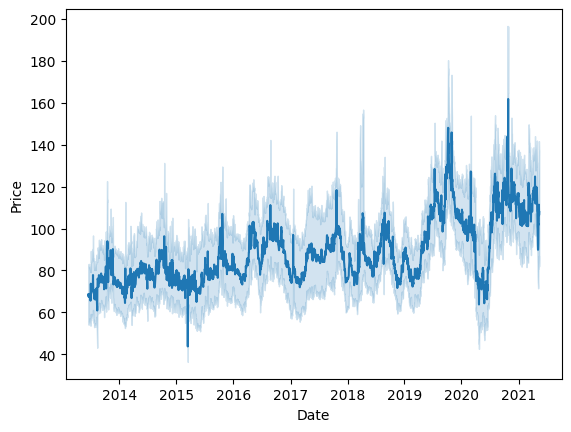

In [52]:
sns.lineplot(x="Date", y="Price", data=df_indexed)
plt.show()


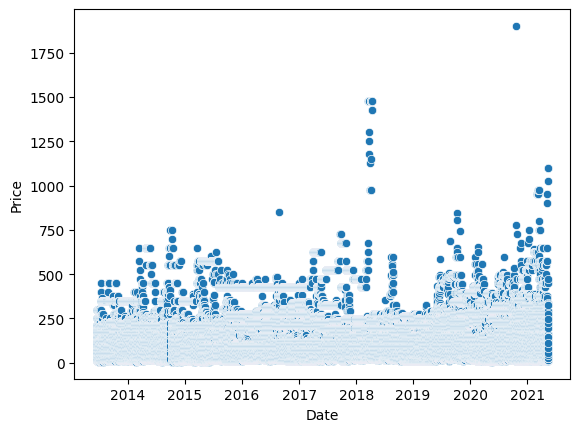

In [53]:
sns.scatterplot(x="Date", y="Price", data=df_indexed)
plt.show()


In [54]:
df_indexed["Price"].min()

np.float64(5.0)

In [55]:
df_indexed["Price"].max()

np.float64(1900.0)

In [56]:
df_indexed[df_indexed["Price"] > 1100]

,Commodity,Price,Item
Date,,,
2018-03-21,Lime,1475.0,65
2018-03-22,Lime,1475.0,65
2018-03-23,Lime,1475.0,65
2018-03-24,Lime,1475.0,65
2018-03-25,Lime,1250.0,65
2018-03-26,Lime,1300.0,65
2018-03-27,Lime,1175.0,65
2018-03-28,Lime,1125.0,65
2018-04-06,Lime,1475.0,65


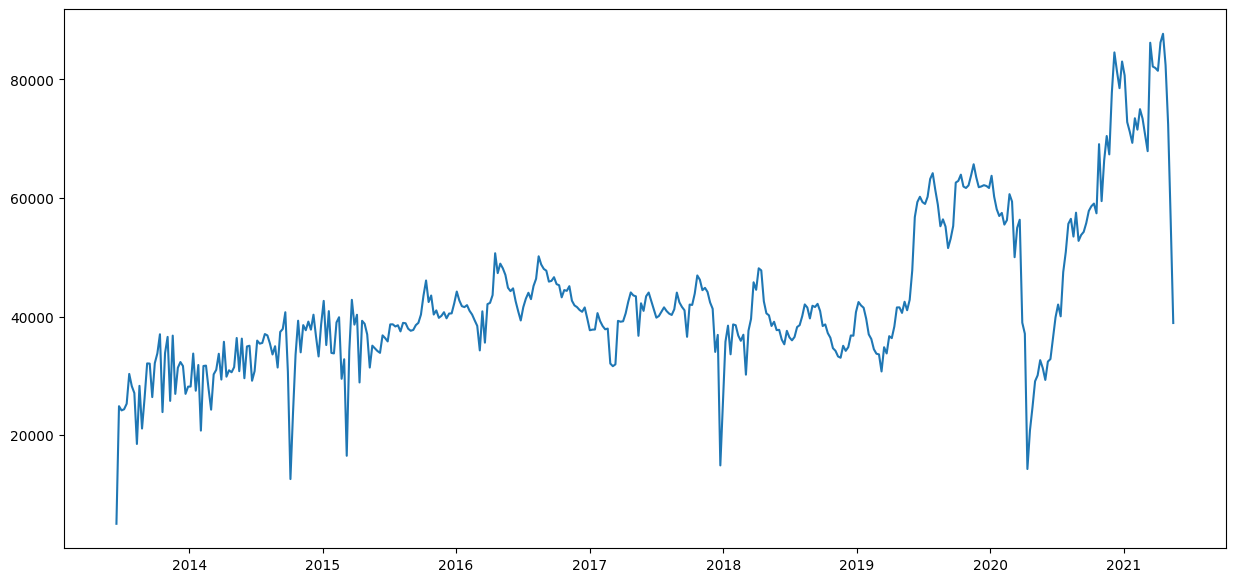

In [58]:
plt.figure(figsize=(15, 7))
plt.plot(df.set_index("Date")["Price"].resample("W").sum(), label="sales")
plt.show()



Analyze Price through item

In [60]:
df.groupby(["Item"]).agg(
    {"Price": ["count", "sum", "mean", "median", "std", "min", "max"]}
)

Price                                                         
     count       sum        mean  median         std    min     max
Item                                                               
0      395  110610.0  280.025316  290.00   39.922188  145.0   345.0
1     2683  328087.5  122.283824  105.00   36.720520   55.0   290.0
2     2020   86056.5   42.602228   42.50    8.996921   11.0    67.5
3     1055  339337.5  321.646919  305.00  148.461336   65.0  1900.0
4     1131   75852.0   67.066313   65.00   23.557621   19.0   125.0
...    ...       ...         ...     ...         ...    ...     ...
127    420   24357.0   57.992857   57.50   16.226395   27.5    85.0
128   2538  141773.5   55.860323   55.00   16.650512   22.5   145.0
129     42    1382.0   32.904762   28.75    7.563744   26.5    52.5
130   2679  123674.5   46.164427   47.50   14.457301   13.5   175.0
131   1105   48179.0   43.600905   42.50   14.704348   19.0   125.0

[132 rows x 7 columns]

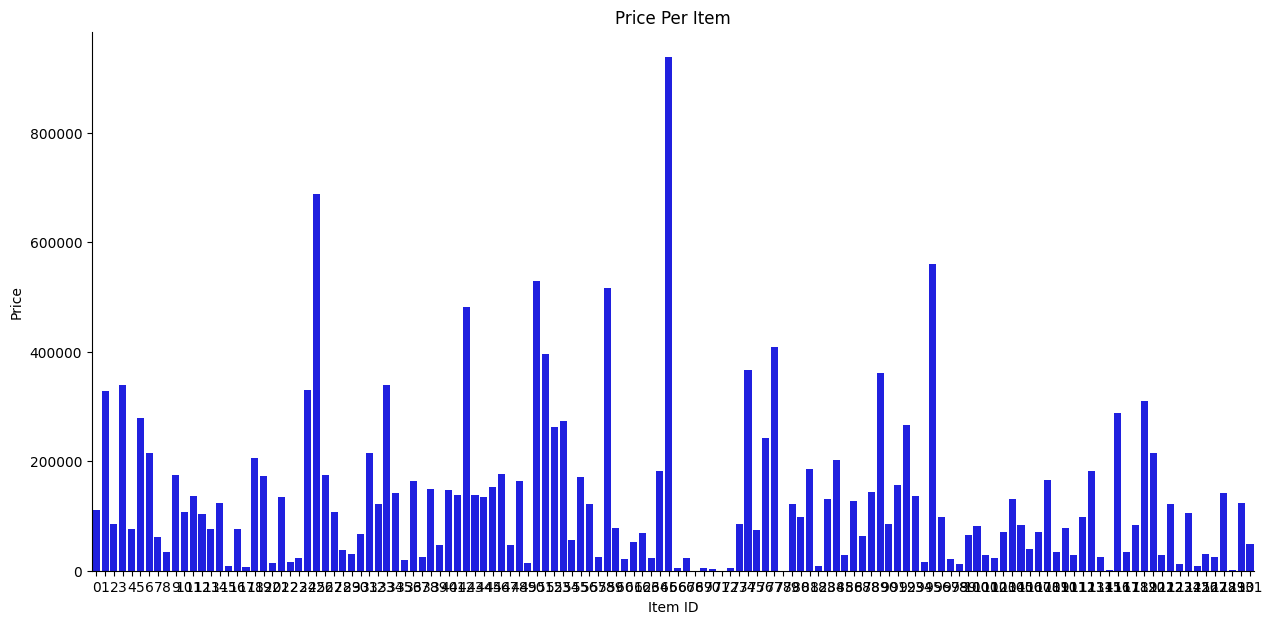

In [64]:
def price_per_item():
    by_item = df.groupby("Item")["Price"].sum().reset_index()

    fig, ax = plt.subplots(figsize=(15, 7))
    sns.barplot(x="Item", y="Price", data=by_item, color="blue")

    ax.set(xlabel="Item ID", ylabel="Price", title="Price Per Item")

    sns.despine()


price_per_item()


In [66]:
df["year"] = df["Date"].dt.year  # extracting year
df["month"] = df["Date"].dt.month  # extracting months
df["day"] = df["Date"].dt.day  # extracting days
df["dayofweek"] = df["Date"].dt.dayofweek  # extracting day of week

df


,Commodity,Date,Price,Item,year,month,day,dayofweek
0,Tomato Big(Nepali),2013-06-16,37.5,122,2013,6,16,6
1,Tomato Small(Local),2013-06-16,29.0,124,2013,6,16,6
2,Potato Red,2013-06-16,20.5,96,2013,6,16,6
3,Potato White,2013-06-16,15.5,99,2013,6,16,6
4,Onion Dry (Indian),2013-06-16,29.0,83,2013,6,16,6
...,...,...,...,...,...,...,...,...
197156,Garlic Dry Nepali,2021-05-13,110.0,51,2021,5,13,3
197157,Fish Fresh(Rahu),2021-05-13,275.0,46,2021,5,13,3
197158,Fish Fresh(Bachuwa),2021-05-13,230.0,43,2021,5,13,3
197159,Fish Fresh(Chhadi),2021-05-13,225.0,44,2021,5,13,3


Changes by Year

In [67]:
agg_year_item = pd.pivot_table(
    df, index="year", columns="Item", values="Price", aggfunc=np.mean
).values


C:\Users\User\AppData\Local\Temp\ipykernel_16692\3885620609.py:1: FutureWarning: The provided callable <function mean at 0x000001793E6CB420> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  agg_year_item = pd.pivot_table(


Text(0, 0.5, 'Relative Sales')

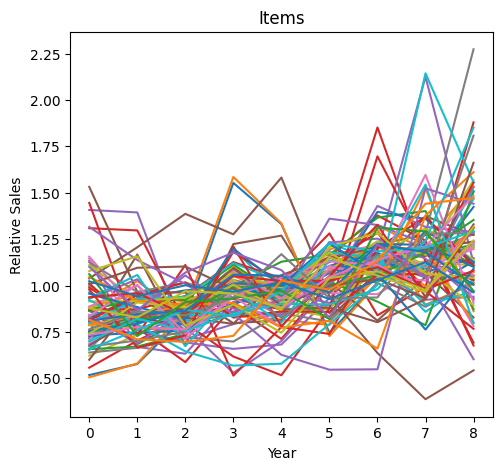

In [68]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(agg_year_item / agg_year_item.mean(0)[np.newaxis])
plt.title("Items")
plt.xlabel("Year")
plt.ylabel("Relative Sales")


Changes by month

In [71]:
agg_month_item = pd.pivot_table(
    df, index="month", columns="Item", values="Price", aggfunc=np.mean
).values


C:\Users\User\AppData\Local\Temp\ipykernel_16692\2360862173.py:1: FutureWarning: The provided callable <function mean at 0x000001793E6CB420> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  agg_month_item = pd.pivot_table(


Text(0, 0.5, 'Relative Sales')

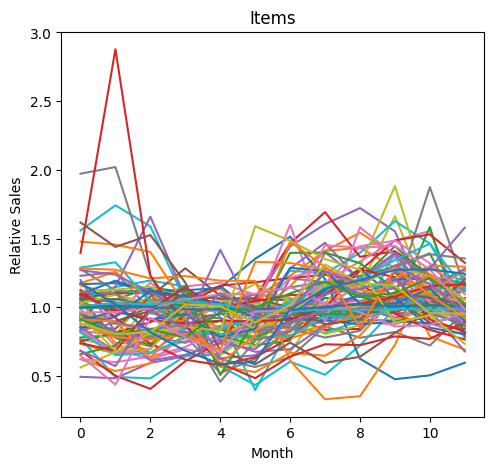

In [72]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(agg_month_item / agg_month_item.mean(0)[np.newaxis])
plt.title("Items")
plt.xlabel("Month")
plt.ylabel("Relative Sales")


In [73]:
agg_dow_month = pd.pivot_table(
    df, index="dayofweek", columns="month", values="Price", aggfunc=np.mean
).values


C:\Users\User\AppData\Local\Temp\ipykernel_16692\3095468723.py:1: FutureWarning: The provided callable <function mean at 0x000001793E6CB420> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  agg_dow_month = pd.pivot_table(


In [74]:
agg_month_year = pd.pivot_table(
    df, index="month", columns="year", values="Price", aggfunc=np.mean
).values


C:\Users\User\AppData\Local\Temp\ipykernel_16692\217386812.py:1: FutureWarning: The provided callable <function mean at 0x000001793E6CB420> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  agg_month_year = pd.pivot_table(


In [75]:
agg_dow_year = pd.pivot_table(
    df, index="dayofweek", columns="year", values="Price", aggfunc=np.mean
).values


C:\Users\User\AppData\Local\Temp\ipykernel_16692\2333711383.py:1: FutureWarning: The provided callable <function mean at 0x000001793E6CB420> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  agg_dow_year = pd.pivot_table(


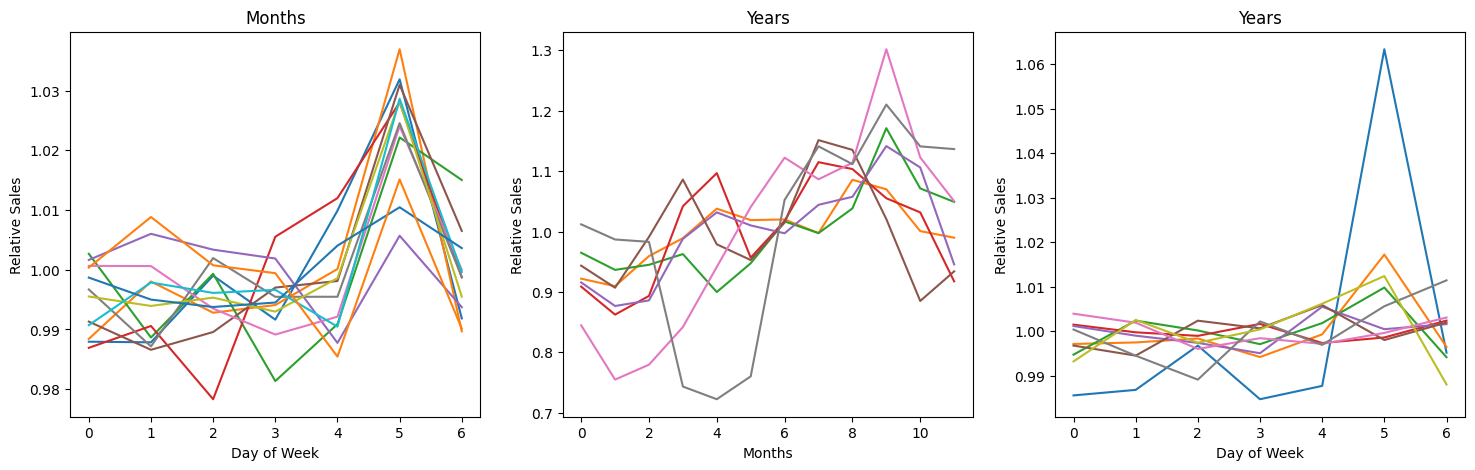

In [76]:
plt.figure(figsize=(18, 5))
plt.subplot(131)
plt.plot(agg_dow_month / agg_dow_month.mean(0)[np.newaxis])
plt.title("Months")
plt.xlabel("Day of Week")
plt.ylabel("Relative Price")
plt.subplot(132)

plt.plot(agg_month_year / agg_month_year.mean(0)[np.newaxis])
plt.title("Years")
plt.xlabel("Months")
plt.ylabel("Relative Price")
plt.subplot(133)

plt.plot(agg_dow_year / agg_dow_year.mean(0)[np.newaxis])
plt.title("Years")
plt.xlabel("Day of Week")
plt.ylabel("Relative Price")
plt.show()


In [77]:
total_avg = df.Price.mean()
total_avg


np.float64(89.79261111477422)

In [79]:
# Monthly pattern
month_table = pd.pivot_table(df, index="month", values="Price", aggfunc=np.mean)
month_table.Price /= total_avg


C:\Users\User\AppData\Local\Temp\ipykernel_16692\2320552449.py:2: FutureWarning: The provided callable <function mean at 0x000001793E6CB420> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  month_table = pd.pivot_table(df, index="month", values="Price", aggfunc=np.mean)


In [80]:
year_table = pd.pivot_table(df, index="year", values="Price", aggfunc=np.mean)
year_table /= total_avg


C:\Users\User\AppData\Local\Temp\ipykernel_16692\909787328.py:1: FutureWarning: The provided callable <function mean at 0x000001793E6CB420> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  year_table = pd.pivot_table(df, index="year", values="Price", aggfunc=np.mean)


In [83]:
years = np.arange(2013, 2019)
annual_price_avg = year_table.values.squeeze()


In [84]:
p1 = np.poly1d(np.polyfit(years[:-1], annual_price_avg, 1))
p2 = np.poly1d(np.polyfit(years[:-1], annual_price_avg, 2))


TypeError: expected x and y to have same length

ValueError: x and y must have same first dimension, but have shapes (5,) and (9,)

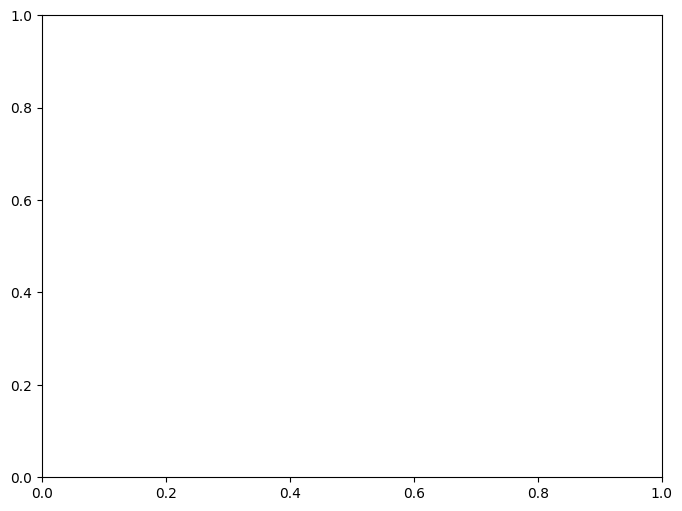

In [85]:
plt.figure(figsize=(8, 6))
plt.plot(years[:-1], annual_price_avg, "ko")
plt.plot(years, p1(years), "C0-")  # Linear growth
plt.plot(years, p2(years), "C1-")  # quadratic growth

plt.xlim(2012.5, 2018.5)

plt.title("Relative Sales by Year")
plt.ylabel("Relative Sales")
plt.xlabel("Year")
plt.show()
